# Erros e seus efeitos

Diferentemente da infindável capacidade humana para raciocinar, imaginar e criar, computadores, como máquinas de calcular, são limitados em memória e em habilidades aritméticas. Diante disso, pelo menos três situações simplificadoras ocorrem:

- o contínuo torna-se _discreto_;
- o infinito reduz-se ao _finito_ e 
- a exatidão limita-se à _aproximação_.

Algumas idéias impactadas por essas simplificações, por sua vez, tornam-se inadmissíveis em sentido estrito. Por exemplo:

- números reais convertem-se em números aproximados;
- limites são exibidos através de sequências;
- derivadas são aproximadas por quocientes de diferenças finitas;
- integrais definidas são calculáveis por meio de somas finitas.

Por isso é comum chamar o processo de transferência de cálculos contínuos para cômputos discretos de _discretização_. 

Quando tratamos da resolução numérica de problemas realistas formulados com auxílio da Matemática, qual seja o campo do conhecimento, é quase impossível desviar-se do _erro_. Erros subsistem em qualquer formulação que tente explicar o funcionamento exato de um fenômeno, em geral, estudado pelas ciências naturais.

De forma abstrata, se um fenômeno físico $\mathcal{F}$ pode ser descrito por um modelo matemático $\mathcal{M}$ cuja solução exata é $\mathcal{S}$, a impossibilidade de obtê-la
sugere pelo menos uma solução aproximada $\mathcal{S}'$, tal que $\mathcal{S} = \mathcal{S}' + \mathcal{E}$. Então, diremos que $\mathcal{E}$ é o _erro_. De outro modo, $\mathcal{E} = \mathcal{S} - \mathcal{S}'$.

Neste capítulo, estudaremos as diversas formas assumidas por $\mathcal{E}$ quando $\mathcal{S}'$ é implementável por meio de métodos numéricos. Evidentemente, pode haver mais de uma forma de obter $\mathcal{S}'$. Além disso, em situações difícies, é preciso estabelecer, com rigor, se $\mathcal{S}$ existe e se é única. Todavia, não discutiremos os procedimentos teóricos de verificação em profundidade.

## Motivação

Como forma de demonstrar que cômputos podem ter resultados distintos, consideremos a somatória (descendente, da maior para a menor parcela)

$$S_D(n) = \sum_{k=1}^n \frac{1}{k} = 1 + \frac{1}{2} + \ldots + \frac{1}{n-1} + \frac{1}{n},$$

e a sua versão escrita de forma "refletida" (ascendente, da menor para a maior parcela), ou seja,

$$S_A(n) = \sum_{k=n}^1 \frac{1}{k} = \frac{1}{n} + 1 + \frac{1}{n-1} + \ldots + \frac{1}{2} + 1.$$

É evidente que $S_A(n)$ e $S_D(n)$ são matematicamente equivalentes e devem produzir o mesmo resultado independentemente de $n$ e do sentido em que forem somadas. Porém, vejamos o que acontece ao programarmos uma pequena função para computar ambas as formas.

In [61]:
from prettytable import PrettyTable as pt

# define séries
def S(n):
    
    S_D = 0
    for k in range(1,n+1):
        S_D += 1/k        
         
    S_A = 0
    for k in range(n,0,-1):
        S_A += 1/k       
    
    # diferença    
    E = S_D - S_A
    
    return S_D, S_A, E
    
# cria objeto para tabela
tbl = pt()
tbl.field_names = ['n','S_A(n)','S_D(n)','S_D(n) - S_A(n)']
tbl.align = 'c'

# loop de teste
for n in [10**1, 10**2, 10**3, 10**4, 10**5]:
    sd, sa, e = S(n)    
    row = [n,sd,sa,e]
    tbl.add_row(row)
   
# imprime tabela
print(tbl)

+--------+--------------------+--------------------+------------------------+
|   n    |       S_A(n)       |       S_D(n)       |    S_D(n) - S_A(n)     |
+--------+--------------------+--------------------+------------------------+
|   10   | 2.9289682539682538 | 2.9289682539682538 |          0.0           |
|  100   | 5.187377517639621  | 5.1873775176396215 | -8.881784197001252e-16 |
|  1000  | 7.485470860550343  | 7.485470860550341  | 2.6645352591003757e-15 |
| 10000  | 9.787606036044348  | 9.787606036044386  | -3.730349362740526e-14 |
| 100000 | 12.090146129863335 | 12.090146129863408 | -7.283063041541027e-14 |
+--------+--------------------+--------------------+------------------------+


Como se percebe pela última coluna, os valores produzidos pelas somas para $n > 10$ não são exatamente iguais. Embora exista diferenças ínfimas nos resultados, elas não são zero, assim indicando que a maneira como computamos expressões matemáticas cujos resultados são idênticos pode levar a resultados distintos. 

O fato de $S_A(n) - S_D(n) > 0$ caracteriza um "erro" de magnitude $\epsilon$, visto que, se $S_A(n)$ fosse tomado como o valor exato, $S_D(n) = S_A(n) + \epsilon$ seria uma aproximação para $S_A(n)$. Inversamente, se $S_D(n)$ fosse tomado como o valor exato, $S_A(n) = S_D(n) + \epsilon$ seria uma aproximação para $S_D(n)$.


Naturalmente, se tomássemos a versão _infinita_ de $S_D$ (ou $S_A$), chamando-a apenas de $S$ e substituindo $n$ por $\infty$, isto é, 

$$S = \sum_{k=1}^{\infty} \frac{1}{k},$$

tanto $S_D(n)$ e $S_A(n)$ seriam consideradas _aproximações_ para $S$. 

Supondo que somente $S_D(n)$ é a forma correta de "chegar perto" de $S$, a implicação

$$S = S_D(n) + \epsilon_n \Rightarrow \epsilon_n = S - S_D(n)$$

revelaria o acréscimo $\epsilon_n$ como uma quantidade não-nula coexistindo com o valor finito $n$. Uma vez que computadores são incapazes de calcular somas infinitas por limitação de memória, $\epsilon_n$ define um tipo de _erro_. Este erro é inerente ao processo de cálculo aproximado de séries infinitas. Além disso, ele dependerá de $n$, ou seja, da quantidade de termos utilizados na soma $S_D$ para aproximar o real valor de $S$.

Entretanto, estamos ainda diante de um problema de difícil tratamento, visto que a soma $S$ só pode ser obtida aproximadamente, pois $\sum_{k=1}^{\infty} \frac{1}{k}$ não é convergente. Logo, é impossível estabelecer um valor "exato" para $S$, a fim de compará-lo com suas aproximações. Caso intentássemos medir discrepâncias no cálculo desta série, teríamos que adotar um valor já aproximado para cumprir o papel de exato e utilizar outros valores também aproximados como "aproximações de uma aproximação". Embora pareça estranho e paradoxal, o que acontece em muitas situações práticas quando lidamos com um _processo iterativo_ ou de _aproximações sucessivas_ é justamente isso.

Vamos tomar os valores da tabela de $S_D(n)$. Suponhamos que $S_D(100000) = 12.090146129863408$ assumisse o papel de valor "exato" de $S$. Fosse este o caso, poderíamos calcular pelo menos quatro erros:

$$E_{10000} = S_D(100000) - S_D(10000) = 2.3025400938190224$$
$$E_{1000} = S_D(100000) - S_D(1000) = 4.604675269313067$$
$$E_{100} = S_D(100000) - S_D(100) = 6.902768612223786$$
$$E_{10} = S_D(100000) - S_D(10) = 9.161177875895154$$

Para obter cada valor acima, poderíamos escrever:

In [62]:
# O valor de S_D(n) está na entrada (i,2) da tabela, para i = 0,1,2,3,4.
# Em Python, cada um é acessível por indexação na forma [i][2]

E_100000 = tbl.rows[4][2]           # i = 4
E_10000 = E_100000 - tbl.rows[3][2] # i = 3
E_1000 = E_100000 - tbl.rows[2][2]  # i = 2
E_100 = E_100000 - tbl.rows[1][2]   # i = 1
E_10 = E_100000 - tbl.rows[0][2]    # i = 0

# Impressão de valores
print(E_100000)
print(E_10000)
print(E_1000)
print(E_100)
print(E_10)

12.090146129863408
2.3025400938190224
4.604675269313067
6.902768612223786
9.161177875895154


Não é difícil ver que o valor de $E$ em relação a $S_D(100000)$ aumenta quando tomamos valores de $n$ cada vez menores. Em outras palavras, nossas aproximações de um valor supostamente exato (aproximado) tornam-se cada vez mais pobres quando não dispomos de parcelas suficientes para somar. Além disso, usar $S_D(100000)$ como ponto de referência não é nada confiável, já que ele apenas fará com que tenhamos uma sensação ilusória de exatidão.

Se, em vez de uma série divergente, escolhermos outra, convergente, poderemos fazer cálculos de erro tomando como referência um valor definitivamente exato. Então, consideremos a série

$$S_2 = \sum_{k=1}^{\infty} \frac{1}{k^2}$$

A série $S_2$ ficou conhecida como [_Problema de Basel_](https://en.wikipedia.org/wiki/Basel_problem), proposto em 1650 pelo matemático italiano Pietro Mengoli, e solucionado por Leonhard Euler em 1734 – _Basel_ é o nome de uma cidade da Suíça, onde Euler nasceu. Graças a Euler e a teoria matemática operante nos bastidores, existe certeza suficiente de que $S_2 = \frac{\pi^2}{6}$.

Do mesmo modo como fizemos no caso anterior, geraremos uma nova tabela para valores de $S_2(n)$ com $n$ crescente até o limite de 100.000, até porque não temos como computar $S_2$ _ad infinitum_. Então, vejamos um código similar:

In [77]:
from math import pi

# define série
def S2(n):
    
    S_2 = 0
    for k in range(1,n+1):
        S_2 += 1/k**2        
             
    # valor exato
    S_2ex = pi**2/6 
    
    # diferença    
    E = S_2ex - S_2
    
    return S_2ex, S_2, E
    
# cria objeto para tabela
tbl2 = pt()
tbl2.field_names = ['n','S_2','S_2(n)','S_2 - S_2(n)']
tbl2.align = 'c'

# loop de teste
for n in [10**1, 10**2, 10**3, 10**4, 10**5]:
    s2, s2n, e = S2(n)    
    row = [n,s2,s2n,e]
    tbl2.add_row(row)
   
# imprime tabela
print(tbl2)

+--------+--------------------+--------------------+-----------------------+
|   n    |        S_2         |       S_2(n)       |      S_2 - S_2(n)     |
+--------+--------------------+--------------------+-----------------------+
|   10   | 1.6449340668482264 | 1.5497677311665408 |  0.09516633568168564  |
|  100   | 1.6449340668482264 | 1.6349839001848923 |  0.009950166663334148 |
|  1000  | 1.6449340668482264 | 1.6439345666815615 | 0.0009995001666649461 |
| 10000  | 1.6449340668482264 | 1.6448340718480652 | 9.999500016122376e-05 |
| 100000 | 1.6449340668482264 | 1.6449240668982423 | 9.999949984074163e-06 |
+--------+--------------------+--------------------+-----------------------+


Neste caso, a diferença existente na última coluna caracteriza, de fato, o _erro real_ entre o valor exato $S_2$ e suas aproximações, de modo que, neste caso,

$$E_{100000} = \frac{\pi^2}{6} - S_2(100000) = 0.000009999949984074163$$
$$E_{10000} = \frac{\pi^2}{6} - S_2(10000) = 0.00009999500016122376$$
$$E_{1000} = \frac{\pi^2}{6} - S_2(1000) = 0.0009995001666649461$$
$$E_{100} = \frac{\pi^2}{6} - S_2(100) = 0.009950166663334148$$
$$E_{10} = \frac{\pi^2}{6} - S_2(10) = 0.09516633568168564$$

A partir daí, notamos que o erro reduz-se a quase zero à medida que o valor de $n$ aumenta, assim dando-nos uma constatação, pelo menos aproximada, de que a soma, de fato, é $\pi^2/6 \approx 1.6449340668482264$. Para obtermos os valores dos erros, um código similar poderia ser implementado:

In [64]:
# Expressões do erro real
E_100000 = pi**2/6 - tbl2.rows[4][2] # i = 4
E_10000 = pi**2/6 - tbl2.rows[3][2]  # i = 3
E_1000 = pi**2/6 - tbl2.rows[2][2]   # i = 2
E_100 = pi**2/6 - tbl2.rows[1][2]    # i = 1
E_10 = pi**2/6 - tbl2.rows[0][2]     # i = 0

# Impressão
print(E_100000)
print(E_10000)
print(E_1000)
print(E_100)
print(E_10)

9.999949984074163e-06
9.999500016122376e-05
0.0009995001666649461
0.009950166663334148
0.09516633568168564


Talvez não tenha sido percebido por você, mas, até aqui, já tratamos, conceitualmente, de três tipificações de erro, a saber:

1. _erro de truncamento_, quando limitamos o número de termos de uma expansão infinita, tornando-a finita.
2. _erro real aproximado_ (ou _erro verdadeiro aproximado_), quando assumimos que o valor exato da expansão infinita (série divergente) é a soma obtida até a parcela $n$, com $n$ muito grande, mas finito, e calculamos a diferença entre este valor e a soma obtida até uma parcela anterior à $n$-ésima;
3. _erro real_ (ou _erro verdadeiro_), quando calculamos a diferença entre a soma exata (série convergente) e a soma obtida até a parcela $n$.

Curioso, não? E não para por aí! Ainda há outras definições de erro. Veremos mais algumas no decorrer do curso.

## Erros na avaliação de polinômios

Consideremos avaliar o polinômio $P(x) = x^3 - 6x^2 + 4x - 0.1$
no ponto $x=5.24$ e comparar com o resultado exato.

Vamos fazer o seguinte:

1. Com uma calculadora, computar o valor de $P(5.24)$ e assuma que este é seu valor exato.

2. Calcular $P(5.24)$ usando arredondamento com dois dígitos de precisão.

**Passo 1**

Faça as suas contas! Suponhamos que seja -0.007776.

**Passo 2**

Vamos "imitar" as contas feitas na mão... 

In [65]:
# parcelas 

p1 = 5.24**3
print('p1: {0:.20g}'.format(p1)) # 20 dígitos significativos
print('p1 (com arredondamento): {0:.2f}'.format(p1)) 

print('\n')

p2 = - 6*5.24**2
print('p2: {0:.20g}'.format(p2))
print('p2 (com arredondamento): {0:.2f}'.format(p2))

print('\n')

p3 = 4*5.24
print('p3: {0:.20g}'.format(p3))
print('p3 (com arredondamento): {0:.2f}'.format(p3))

print('\n')

p4 = - 0.1
print('p4: {0:.20g}'.format(p4))
print('p4 (com arredondamento): {0:.2f}'.format(p4))

print('\n')

Px = p1 + p2 + p3 + p4
print('Px: {0:.20g}'.format(Px))
print('Px: (com arredondamento): {0:.2f}'.format(Px))

p1: 143.87782400000000393
p1 (com arredondamento): 143.88


p2: -164.74560000000002447
p2 (com arredondamento): -164.75


p3: 20.960000000000000853
p3 (com arredondamento): 20.96


p4: -0.10000000000000000555
p4 (com arredondamento): -0.10


Px: -0.0077760000000196838332
Px: (com arredondamento): -0.01


**Conclusão:** o cálculo com dois dígitos afeta o resultado drasticamente!

Agora, vamos comparar o resultado de se avaliar $P(5.24)$ com as duas formas do polinômio e 16 dígitos de precisão:

In [66]:
# ponto de análise
x = 5.24

# P1(x) 
P1x = x**3 - 6*x**2 + 4*x - 0.1 
print('{0:.16f}'.format(P1x))

# P2(x) 
P2x = x*(x*(x - 6) + 4) - 0.1 # forma estruturada (forma de Hörner)
print('{0:.16f}'.format(P2x))


-0.0077760000000197
-0.0077759999999939


O que temos acima? Dois valores levemente distintos. Se computarmos os erros absoluto e relativo entre esses valores e nosso valor supostamente assumido como exato, teríamos: 

**Erros absolutos**

In [67]:
x_exato = -0.007776
EA1 = abs(P1x - x_exato)
print(EA1)

EA2 = abs(P2x - x_exato)
print(EA2)

1.968390728190883e-14
6.1287780406260595e-15


Claro que $EA_1 > EA_2$. Entretanto, podemos verificar pelo seguinte teste lógico:

In [68]:
# teste é verdadeiro
EA1 > EA2

True

**Erros relativos**

Os erros relativos também podem ser computados como:

In [69]:
ER1 = EA1/abs(x_exato)
print(ER1)

ER2 = EA2/abs(x_exato)
print(ER2)

2.5313666772002096e-12
7.881659002862731e-13


**Gráfico de $P(x)$**

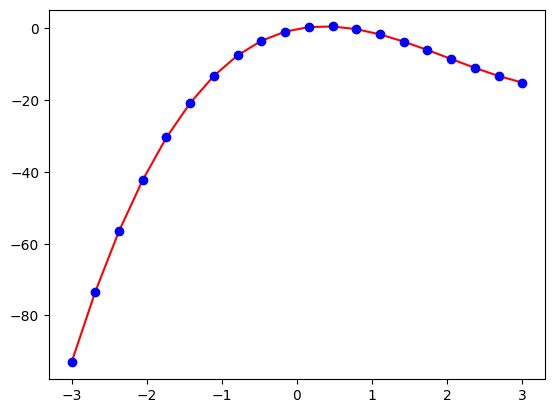

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# eixo x com 20 pontos
x = np.linspace(-3,3,num=20,endpoint=True)

# plotagem de P1(x) e P2(x)
P1x = lambda x: x**3 - 6*x**2 + 4*x - 0.1
P2x = lambda x: x*(x*(x - 6) + 4) - 0.1
plt.plot(x,P1x(x),'r',x,P2x(x),'bo');

### Função de Airy

A função de Airy é solução da equação de Schrödinger da mecânica quântica. Muda o comportamento de oscilatório para exponencial.

Abaixo, vamos criar uma função aproximada (perturbada) para a função de Airy (assumindo-a como uma aproximação daquela que é exata) e outra para calcular diretamente o erro relativo para valores dessas funções.


In [71]:
from scipy import special
import matplotlib.pyplot as plt 

# eixo x 
x = np.linspace(-10, -2, 100)

# funções de Airy e derivadas (solução exata)
ai, aip, bi, bip = special.airy(x)

# função de Airy (fazendo papel de solução aproximada)
ai2 = 1.1*ai + 0.05*np.cos(x) 

Podemos usar o conceito de _função anônima_ para calcular diretamente o **erro relativo percentual** para cada ponto $x$:

$$ER_p(x) = \frac{\mid \ f_{aprox}(x) - f_{ex}(x) \ \mid}{\mid \ f_{ex}(x) \ \mid},$$

onde $f_{aprox}(x)$ é o valor da função aproximada (de Airy) e 
onde $f_{ex}(x)$ é o valor da função exata (de Airy).

In [72]:
# define função anônima para erro relativo
r = lambda fex,faprox: (np.abs(fex-faprox)/np.abs(fex))/100

# calcula erro relativo para função de Airy e sua aproximação
rel = r(ai,ai2)

A seguir, mostramos a plotagem das funções exatas e aproximadas, bem como do erro relativo pontual.

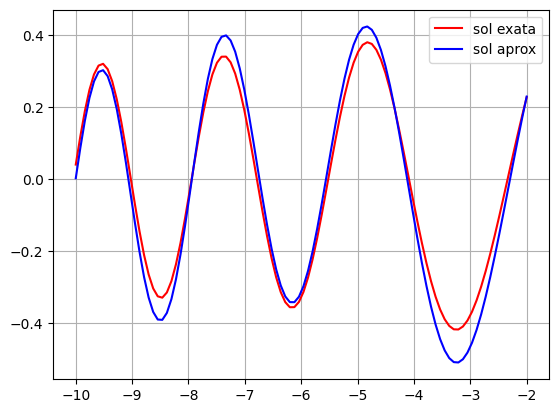

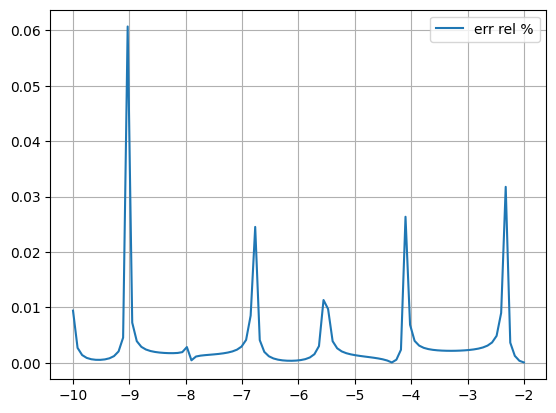

In [73]:
# plotagens 
plt.plot(x, ai, 'r', label='sol exata')
plt.plot(x, ai2, 'b', label='sol aprox')
plt.grid()
plt.legend(loc='upper right')
plt.show()

plt.plot(x,rel,'-', label='err rel %')
plt.grid()
plt.legend(loc='upper right');

## Erro de cancelamento

Ocorre quando números de grandezas próximas são subtraídos. No exemplo, a seguir, induzimos uma divisão por zero usando o valor do épsilon de máquina $\epsilon_m$ ao fazer 

$$\dfrac{1}{(1 + 0.25\epsilon_m) - 1}$$

Isto ocorre porque o denominador sofre um _cancelamento subtrativo_, quando, para a matemática precisa, deveria valer $0.25\epsilon_m$.

## Propagação de erros

Vamos comparar duas situações. Calcular 

$$e^{-v} = \sum_{i=0}^{\infty} (-1)^i \frac{v^i}{i!}$$

e comparar com a identidade $$e^{-v} = \dfrac{1}{e^v}.$$

In [74]:
# somatória (primeiros 20 termos)
v = 5.25
s = 0
for i in range(20):    
    print('{0:5g}'.format(s))    
    s += ((-1)**i*v**i)/np.math.factorial(i)

print('\ncaso 1: {0:5g}'.format(s))    

print('caso 2: {0:5g}'.format(1/np.exp(v)))

    0
    1
-4.25
9.53125
-14.5859
17.0679
-16.1686
12.9133
-8.89814
5.41562
-2.93407
1.44952
-0.642652
0.272671
-0.0969786
0.0416401
-0.00687642
0.00904307
0.00412676
0.00556069

caso 1: 0.00516447
caso 2: 0.00524752


## Exemplos

### Erro relativo percentual

Dois estudantes medem a altura h da sala de aula com dois instrumentos de medida diferentes e encontram, respectivamente $h_1 = 2.965 \pm 0.001 \, m$ e $h_2 = 2.964 \pm 0.002\, m$. Qual o erro relativo percentual cometido por cada um? 

#### Solução 

O valor exato $h$ não é conhecido. O primeiro estudante tem um instrumento cujo erro máximo cometido é $EA_1 = 0.001 \, m$; o segundo, $EA_2 = 0.002 \, m$. Notemos que pelas expressões $EA_1 = | h - h_1 |$ e $EA_2 = | h - h_2 |$, os erros absolutos não são diretamente computáveis. Logo, temos que usar limitantes de erro. 

Assim, os erros relativos são computados com base nos limitantes e nos valores medidos (aproximados). Portanto,  

$$ER_1 = (EA_1/2.965) \times 100\% = (0.001/2.965) \times 100\% = 0.0337\%$$

$$ER_2 = (EA_2/2.964) \times 100\% = (0.002/2.964) \times 100\% = 0.0675\%$$

### Erro máximo

Uma sala de formato retangular foi medida e foram obtidos 8 m e 12 m como sendo sua largura e seu comprimento, respectivamente. Sabendo que o erro cometido em cada uma dessas medições foi de no máximo 2 cm, determine o erro máximo cometido no cálculo de sua área. 

#### Solução

Sejam:

- $a'$: largura aproximada (obtida pela medição)
- $b'$: comprimento aproximado (obtido pela medição) 
- $a$:  largura exata da sala; 
- $b$:  comprimento exato da sala
- $A'$: área aproximada da sala; 
- $A$:  área exata 

São dados $a' = 8m$ e $b' = 12 \, m$. Portanto, $A' = a'b' = 8.12 = 96 \, m^2$. 

Por hipótese, $EA_a = |a-a'| \leq 2 \, cm$ e $EA_b = |b−b'| \leq 2 \, cm$. 

Ou seja, $|a−8| \leq 0.02 \, m$ e $|b−12| \leq 0.02 \, m$, que equivalem a 
$$−0.02 \leq a−8 \leq 0.02 \Rightarrow$$ 
$$8−0.02 \leq a \leq 8+0.02 \Rightarrow$$
$$7.98 \leq a \leq 8.02 \quad(i)$$
$$\text{e}$$
$$−0.02 \leq b−12 \leq 0.02 \Rightarrow$$
$$12−0.02 \leq b \leq 12+0.02 \Rightarrow$$
$$11.98 \leq b \leq 12.02 \quad (ii).$$ 

Multiplicando (i) e (ii), obtemos: 
$$95.6004 \leq ab \leq 96.4004 \Rightarrow \\
  95.6004 \leq A \leq 96.4004 \Rightarrow \\
  A \in [95.6004, 96.4004].$$ 
  
Como $A'$ também pertence ao intervalo, a maior distância entre $A$ e $A'$ ocorre quando $A$ for uma das extremidades do intervalo. Portanto, como 
$$|96.0000 − 95.6004| = 0.3960 \, m^2,$$ 

o erro máximo no cálculo da área é de 
$$|96.0000 − 96.4004| = 0.4004 \, m^2.$$ 

### Truncamento e arredondamento

Considere o sistema $\mathbb{F}(10,4,−3,3)$. Isto é, a representação exata de um númeor real deve ter a forma: $\pm 0.d_1d_2d_3d_4 \times 10^e$, com $d_1 \neq 0$ e $e \in \{−3,−2,−1,0,1,2,3\}$. Sejam $x = 0.2345 \times 10^3$ e $y = 0.7000 \times 10^{−1}$.

Sabemos que $x + y = 234.5 + 0.07 = 234.57$. No entanto, este resultado não pode ser representado neste sistema, pois para isto precisaríamos de cinco dígitos! No caso, seria $x + y = 0.2345{7} \times 10^3.$

Como aproximar a soma $s = x + y$, de tal forma que seja possível representá-la nesse sistema de ponto flutuante?

#### Solução 

Determine os erros.

Temos $d_1 = 2, d_2 = 3,d_3 = 4,d_4 = 5$ e $d_5 = 7$. 

##### Aproximação por Truncamento 

Despreze o quinto dígito ($d_5 = 7$) para obter $\bar{s} = 0.2345 \times 10^3 = 234.5$. 

Neste caso, o Erro Absoluto é:$|EA_s|=|s−\bar{s}|=
|234.57−234.5|=0.07$. 

O valor absoluto do Erro Relativo é: $|ER_s| = \frac{0.07}{234.5} \approx 0.2985 \times 10^{−3}.$

##### Aproximação por Arredondamento 

O quinto dígito ($d_5 = 7$) é levado em conta, assim provocando uma modificação no quarto dígito ($d_4 = 5$). Como $7 \geq 5$, soma-se $0.5 \times 10^{−4} = 0.00005$ a $s$, obtendo-se: 
$$\bar{s} = 0.23462\times 10^3.$$

Daí, trunca-se $\bar{s}$ no quarto novo dígito. 

A aproximação de $s$ por arredondamento é $\bar{s} = 0.2346\times 10^3$.

Neste caso o Erro Absoluto é: $|EA_s|=|s−\bar{s}|=|234.57−234.6|=0.03.$

O Erro Relativo é: $|ER_s| = \frac{0.03}{234.6} \approx 0.1278\times 10^{−3}.$

## Definições de erro em aprendizagem de máquina

No século XXI, muito se tem falado em aprendizagem de máquina, inteligência artificial e dados. Diversas definições de erro também existem neste contexto, quando o interesse é medir erros em conjuntos de dados. Por exemplo, no campo das redes neurais convolucionais, o cálculo da função de _perda_ (_loss function_) entre pixels de uma imagem legendada como _ground truth_ (gabarito) e de outra imagem processada, é geralmente realizado por meio de expressões que caracterizam erros. A seguir, exploraremos algumas dessas métricas. Em todos os cálculos, $y_i$ é o valor do gabarito (exato), $\hat{y_i}$ é o valor aproximado e $n$ é o número de pontos de amostragem.

### Erro quadrático médio

O erro quadrático médio (_mean squared error_, MSE) é definido como:

$$MSE = \dfrac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

### Erro absoluto médio

O erro absoluto médio (_mean absolute error_, MAE) é definido como:

$$MAE = \dfrac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|$$

### Erro absoluto médio percentual

O erro absoluto médio percentual (_mean absolute percentage error_, MAPE) é definido como:

$$MAPE = \dfrac{1}{n}\sum_{i=1}^n \dfrac { |y_i - \hat{y}_i| }{ | y_i | } \times 100$$

### Erro logarítmico quadrático médio 

O erro logarítmico quadrático médio (_mean squared logarithmic error_, MSLE) é definido como:

$$MSLE = \dfrac{1}{n}\sum_{i=1}^n [ \log(1+ y_i) - \log(1 + \hat{y}_i) ]^2$$